In [1]:
import logging
import numpy as np
import matplotlib.pyplot as plt
import math 

def yaw_pitch(look_vec):
    v = look_vec / np.linalg.norm(look_vec)
    pitch = -np.rad2deg(np.arcsin(v[1]))
    yaw = -np.rad2deg(np.arctan2(v[0], v[2]))
    return yaw, pitch

def get_camera_angles(camera_pos, look_at_pnt):
    """get the new yaw/pan and pitch/tilt angle values and update the camera's
    new look direction."""
    logging.debug(f"look_at_point: {np.array(look_at_pnt)}")
    logging.debug(f"camera_position: {np.array(camera_pos)}")
    logging.debug(f"difference: {np.array(look_at_pnt) - np.array(camera_pos)}")
    look_dir = np.array(look_at_pnt) - np.array(camera_pos)
    logging.debug(f"Un-normalized look direction: {look_dir}")
    if np.linalg.norm(look_dir) < 0.01:
        return 0.0, 0.0
    look_dir = look_dir / np.linalg.norm(look_dir)
    return yaw_pitch(look_dir)

def get_step_target_for_move(base_pos, target, step_size=0.1):
    """
    Heuristic to get step target of step_size for going to from base_pos to target. 

    Args:
        base_pos ([x,z,yaw]): robot base in canonical coords
        target ([x,y,z]): point target in canonical coords
    
    Returns:
        move_target ([x,z,yaw]): robot base move target in canonical coords 
    """

#     dx = target[0] - base_pos[0]
#     signx = 1 if dx > 0 else -1 

#     dz = target[2] - base_pos[1]
#     signz = 1 if dz > 0 else -1 

#     targetx = base_pos[0] + signx * (step_size)
#     targetz = base_pos[1] + signz * (step_size) 
    
#     print(f'cur_pos {base_pos[:2]} target {target[0], target[2]}')
    
    dx = target[0] - base_pos[0]
    dz = target[2] - base_pos[1]

    if dx == 0: # vertical line 
        print('vertical slope')
        theta = math.radians(90)
    else:
        theta = math.atan(abs(dz/dx))
    
    
    signx = 1 if dx >= 0 else -1
    signz = 1 if dz >= 0 else -1
    
    targetx = base_pos[0] + signx * step_size * math.cos(theta)
    targetz = base_pos[1] + signz * step_size * math.sin(theta)
    
#     print(f'signx {signx}, targetx {targetx}')
#     print(f'signz {signx}, targetz {targetx}')

    yaw, _ = get_camera_angles([targetx, 0.6, targetz], target)
    
    return [targetx, targetz, yaw] 

In [2]:
# make a 2D grid, set pos, target, call the fn to test
def path(ss, tt):
    print(f'Path from {ss} to {tt}')
    g = np.random.choice(a=[0, 0], size=(15,15))
#     plt.imshow(g)
#     plt.show()
#     print(g)
    t = [tt[0],0,tt[1]]
    s = [ss[0],ss[1],0]

    g[t[2], t[0]] = 1
    g[s[1], s[0]] = 1

    steps = 0

    while True:
        n = get_step_target_for_move(s, t, 1)
#         print(f'next step {n}')

        s = n
        if s[1] == t[2] and s[0] == t[0]:
            break
        g[round(n[1]), round(n[0])] = 1
        steps += 1
        if steps > 20:
            break

#     print(g)
#     plt.imshow(g)
#     plt.show()
    return g

In [3]:
path([2,9], [1,4])

Path from [2, 9] to [1, 4]


array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

Path from (9, 0) to (2, 4)
Path from (8, 9) to (4, 1)
Path from (4, 4) to (5, 6)
Path from (9, 9) to (1, 4)
Path from (6, 9) to (3, 4)
Path from (6, 8) to (7, 0)
Path from (0, 9) to (5, 5)
Path from (4, 2) to (3, 1)
Path from (5, 4) to (3, 1)
Path from (9, 2) to (3, 4)
Path from (9, 1) to (8, 3)
Path from (9, 7) to (6, 0)
Path from (1, 0) to (3, 3)
Path from (7, 4) to (1, 3)
Path from (5, 9) to (8, 8)
Path from (0, 5) to (8, 4)
Path from (9, 1) to (2, 0)
Path from (5, 2) to (3, 8)
Path from (0, 2) to (1, 4)
Path from (6, 2) to (0, 1)
Path from (9, 7) to (4, 1)
Path from (2, 8) to (4, 6)
Path from (0, 4) to (7, 9)
Path from (3, 5) to (7, 8)
Path from (4, 9) to (6, 3)
Path from (2, 6) to (8, 7)
Path from (8, 6) to (2, 5)
Path from (4, 3) to (0, 7)
Path from (4, 6) to (5, 2)
Path from (7, 2) to (5, 2)
Path from (7, 7) to (4, 0)
Path from (1, 6) to (0, 7)
Path from (8, 7) to (5, 8)
Path from (8, 3) to (4, 5)
Path from (6, 3) to (3, 3)
Path from (0, 1) to (8, 1)
Path from (9, 2) to (1, 4)
P

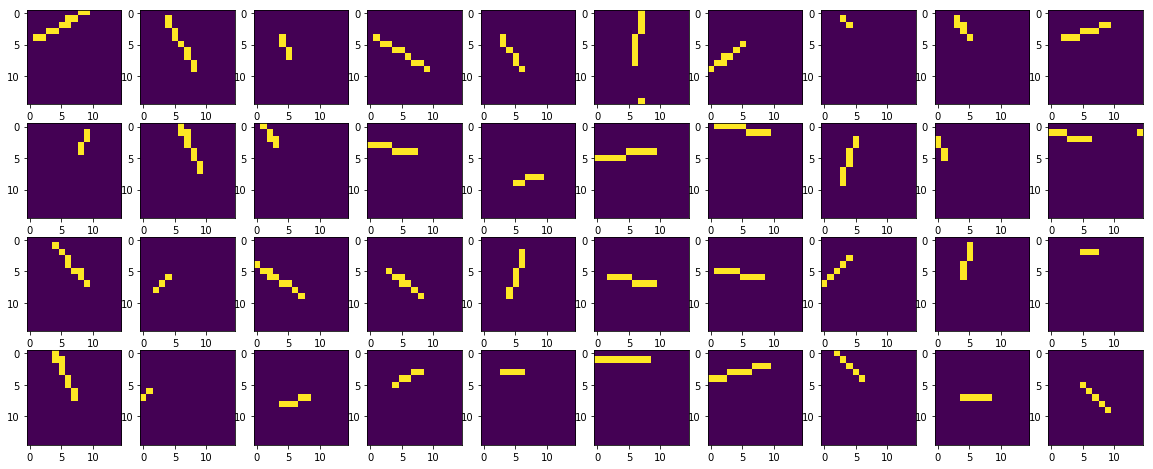

In [5]:
import random
# random.seed(1)
def get_random_point(n=9):
    return random.randint(0, n), random.randint(0, n)

plt.rcParams["figure.figsize"] = (20,8)

fig, axs = plt.subplots(4, 10)
for x in range (4):
    for y in range(10):
        s = get_random_point()
        t = get_random_point()
        g = path(s, t)
        axs[x,y].imshow(g)

plt.show()

In [6]:
from math import pi
def get_circular_path(r, n=10):
    return [[math.cos(2*pi/n*x)*r,math.sin(2*pi/n*x)*r] for x in range(0,n+1)]

In [26]:
def circular_path(ss, tt):
#     print(f'Circular path around {tt}')
    g = np.random.choice(a=[0, 0], size=(20,20))
#     plt.imshow(g)
#     plt.show()
#     print(g)
    t = [tt[0]+5,tt[1]+5]
    s = [ss[0]+5,ss[1]+5]

    g[t[1], t[0]] = 1
#     g[s[1], s[0]] = 1

    steps = 0
    
    pts = get_circular_path(r=3)
    c = None
    d = 10000
    for x in pts:
#         print(x)
        n = [t[0]+x[0], t[1]+x[1]]
        cd = np.linalg.norm(np.asarray(n) - np.asarray(s))
        if cd <= d:
            d = cd
            c = n
        g[round(n[1]), round(n[0])] = 1

        
    # get closest point on circumference 
    print(f'closest point {c}')
    
    while True:
        n = get_step_target_for_move([s[0],s[1],0], [round(c[0]), 0, round(c[1])], 1)
#         print(f'next step {n}')
        s = n
        if s[1] == round(c[1]) and s[0] == round(c[0]):
            print('reached dest')
            break
        g[round(n[1]), round(n[0])] = 1
        steps += 1
        if steps > 20:
            break

#     print(g)
#     plt.imshow(g)
#     plt.show()
    return g

closest point [11.0, 8.0]
reached dest
closest point [12.927050983124841, 7.146830451114539]
closest point [8.0, 11.0]
reached dest
closest point [8.0, 6.999999999999999]
reached dest
closest point [6.072949016875158, 10.146830451114539]
closest point [7.572949016875157, 9.23664424312258]
closest point [12.072949016875157, 8.146830451114539]
reached dest
closest point [12.072949016875159, 8.853169548885461]
closest point [9.927050983124843, 12.853169548885461]
closest point [5.9270509831248415, 8.146830451114539]


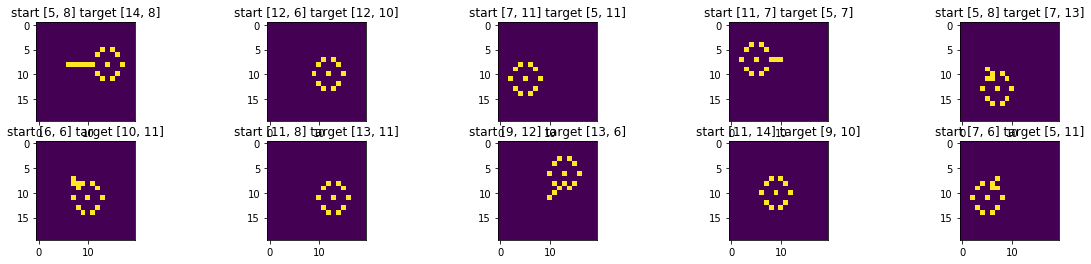

In [27]:
def get_random_point(n=9):
    return random.randint(0, n), random.randint(0, n)

plt.rcParams["figure.figsize"] = (20,4)

fig, axs = plt.subplots(2, 5)
for x in range (2):
    for y in range(5):
        s = get_random_point()
        t = get_random_point()
        g = circular_path(s, t)
        axs[x,y].imshow(g)
        axs[x,y].set_title(f'start {[s[0]+5, s[1]+5]} target {[t[0]+5, t[1]+5]}')

plt.show()

